In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Crop Production data.csv")
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [4]:
df.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [5]:
df.nunique()

State_Name          33
District_Name      646
Crop_Year           19
Season               6
Crop               124
Area             38442
Production       51627
dtype: int64

In [6]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

C:\Users\vgund\AppData\Local\Temp\ipykernel_10920\1751021242.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Crop_Year', y='Production', estimator='sum', ci=None)
C:\Users\vgund\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vgund\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


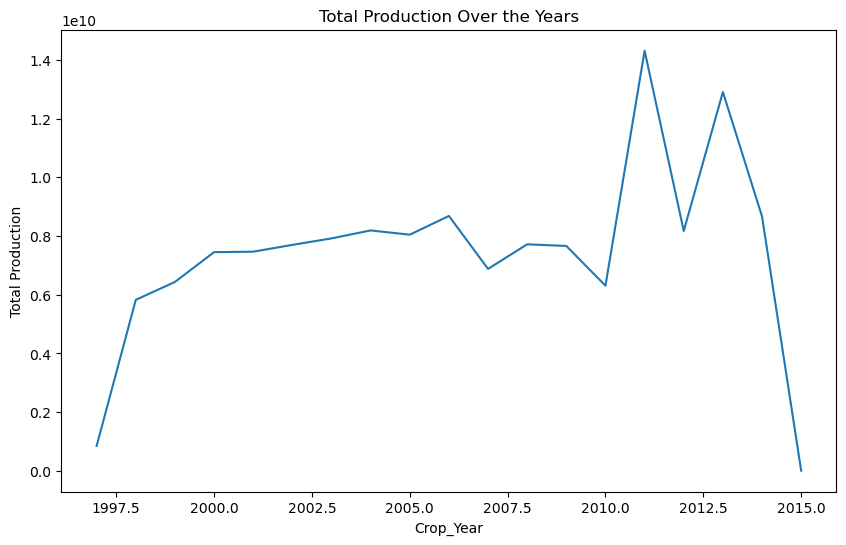

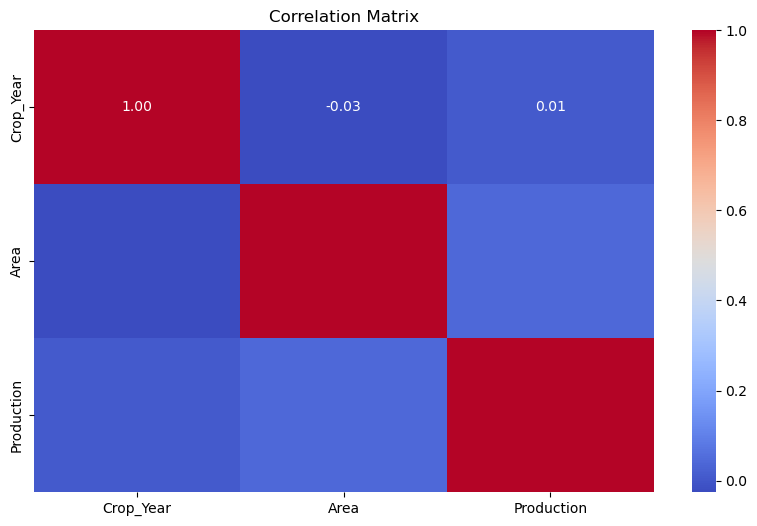

In [7]:
# Trends over the years
plt.figure(figsize=(10, 6))
plt.title('Total Production Over the Years')
sns.lineplot(data=df, x='Crop_Year', y='Production', estimator='sum', ci=None)
plt.ylabel('Total Production')
plt.show()

# Correlations
plt.figure(figsize=(10, 6))
plt.title('Correlation Matrix')
sns.heatmap(df[['Crop_Year', 'Area', 'Production']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

Top 5 crops with highest production

In [8]:
top_crops = df.groupby('Crop')['Production'].sum().nlargest(5)
top_crops

Crop
Coconut      1.299816e+11
Sugarcane    5.535682e+09
Rice         1.605470e+09
Wheat        1.332826e+09
Potato       4.248263e+08
Name: Production, dtype: float64

C:\Users\vgund\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vgund\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


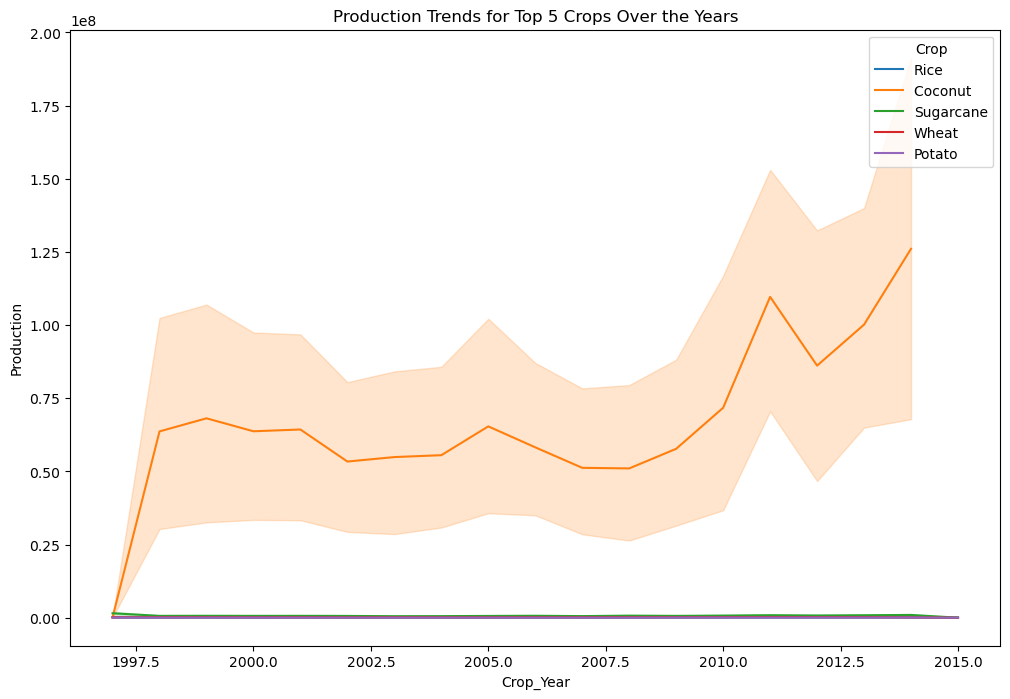

In [9]:
top_crops_trends = df[df['Crop'].isin(top_crops.index)]

plt.figure(figsize=(12, 8))
plt.title('Production Trends for Top 5 Crops Over the Years')
sns.lineplot(data=top_crops_trends, x='Crop_Year', y='Production', hue='Crop')
plt.ylabel('Production')
plt.legend(title='Crop')
plt.show()

In [10]:
# Create synthetic weather data
np.random.seed(42)
years = np.arange(2000, 2020)
weather_data = pd.DataFrame({
    'Year': np.random.choice(years, 100),
    'Temperature': np.random.normal(25, 5, 100),
    'Rainfall': np.random.normal(100, 20, 100)
})

# Merge weather data with crop production data
merged_data = pd.merge(df, weather_data, left_on='Crop_Year', right_on='Year', how='inner')

# Calculate correlation between weather conditions and crop production
weather_crop_corr = merged_data[['Temperature', 'Rainfall', 'Production']].corr()
weather_crop_corr

,Temperature,Rainfall,Production
Temperature,1.000000,0.034478,0.000651
Rainfall,0.034478,1.000000,-0.000936
Production,0.000651,-0.000936,1.000000


C:\Users\vgund\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vgund\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


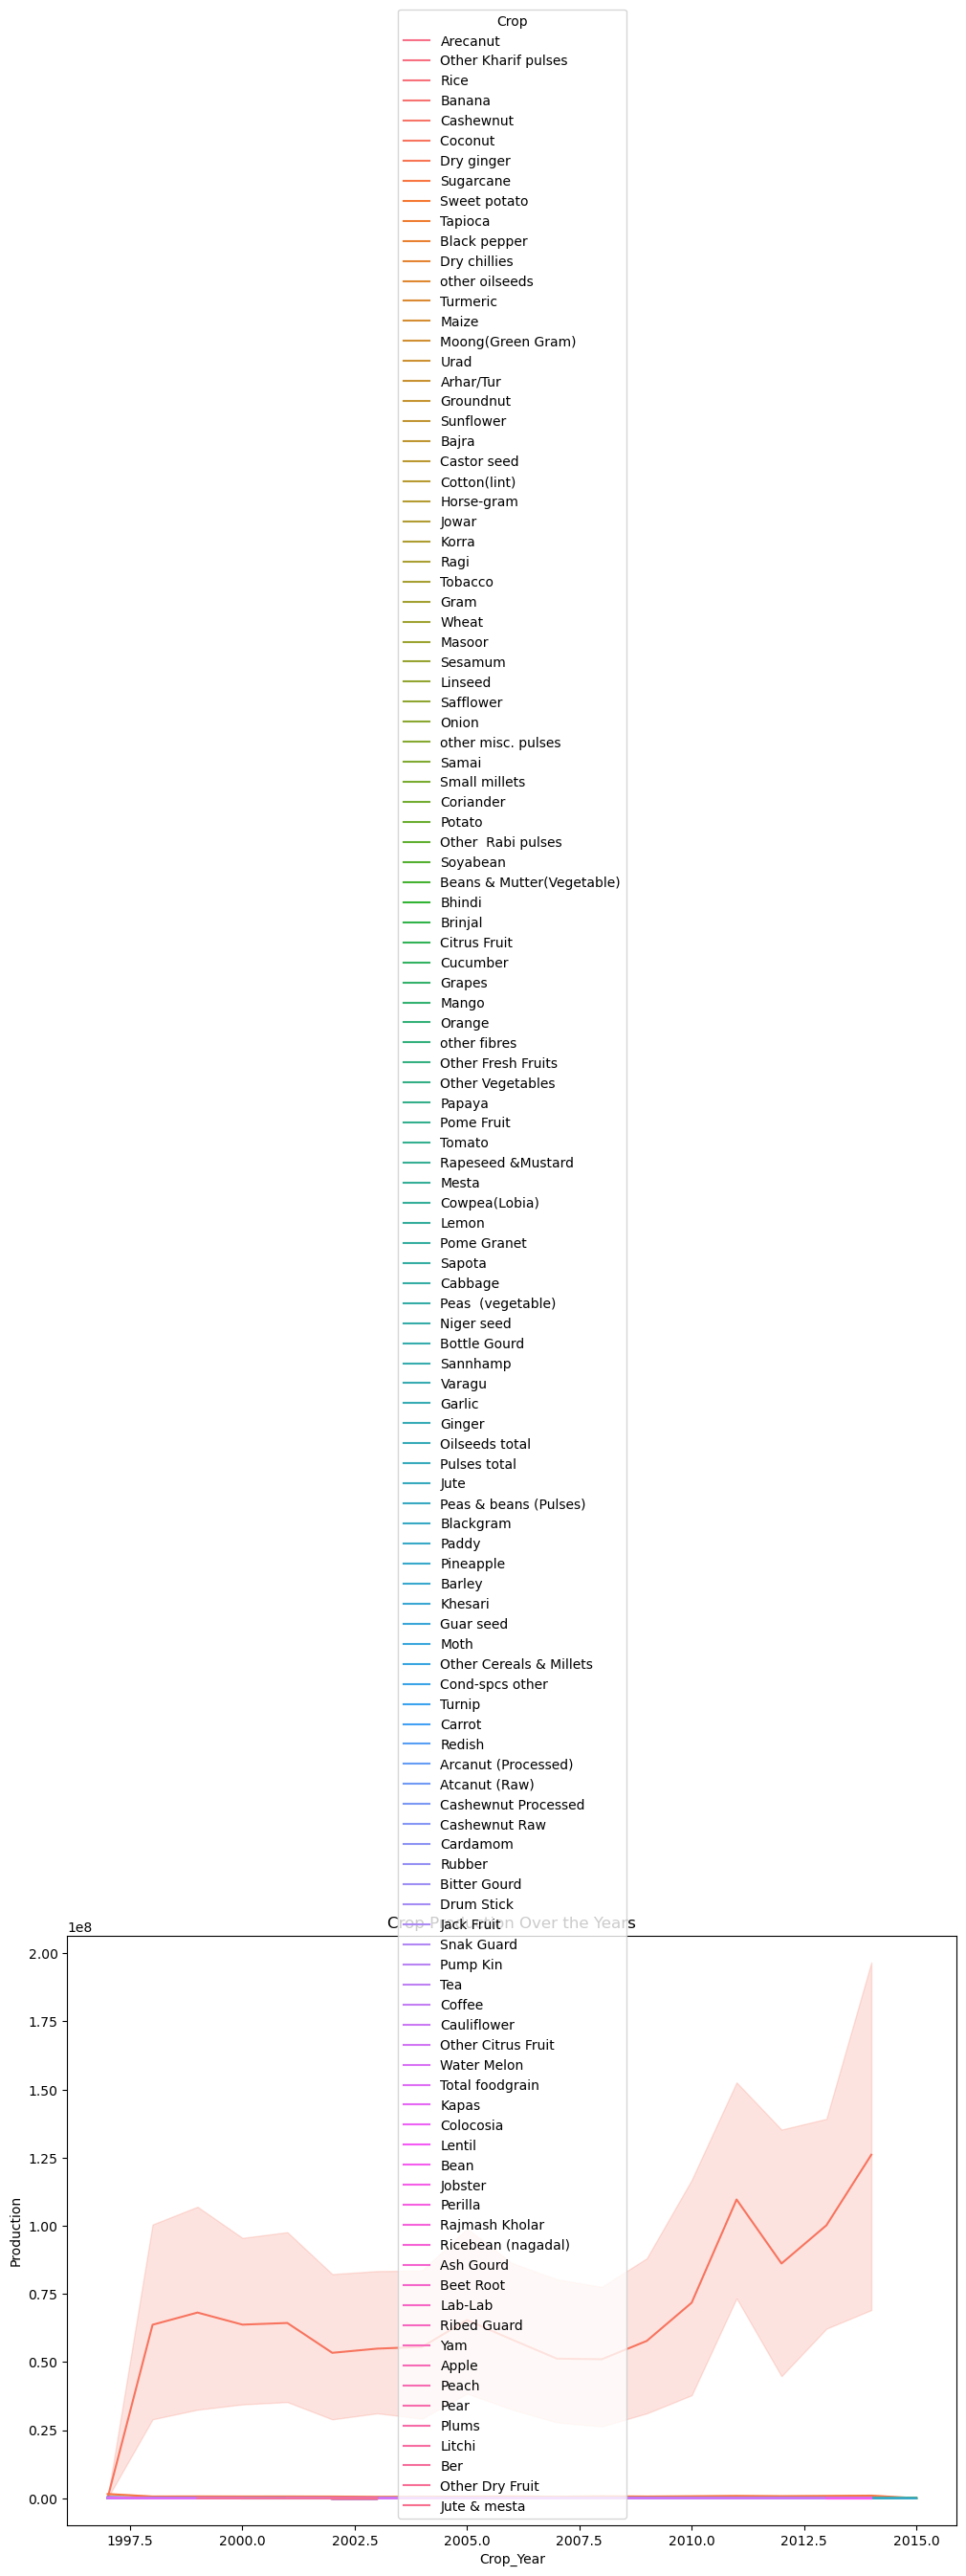

In [11]:
# Time series analysis of crop production over the years
plt.figure(figsize=(12, 8))
plt.title('Crop Production Over the Years')
sns.lineplot(data=df, x='Crop_Year', y='Production', hue='Crop')
plt.ylabel('Production')
plt.legend(title='Crop')
plt.show()

In [15]:
# Assuming 'Season' is a categorical variable, we need to convert it to numerical for correlation analysis
# We will use label encoding for 'Season'
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Fit and transform the 'Season' column
df['Season_encoded'] = le.fit_transform(df['Season'])

# Calculate the correlation between 'Crop_Year' and 'Season_encoded'
correlation = df[['Crop_Year', 'Season_encoded']].corr()
correlation

,Crop_Year,Season_encoded
Crop_Year,1.000000,-0.032866
Season_encoded,-0.032866,1.000000


C:\Users\vgund\AppData\Local\Temp\ipykernel_10920\2738521145.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='State_Name', y='Production', ci=None)


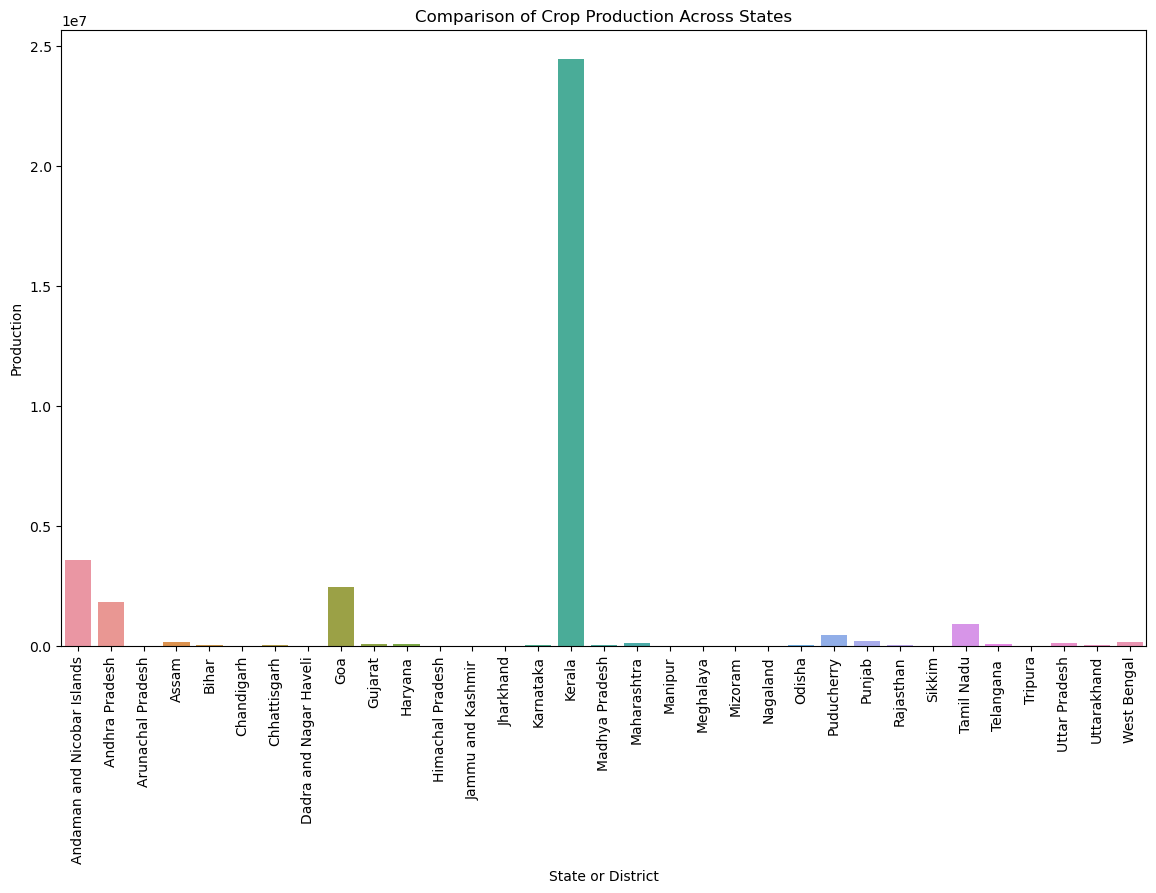

In [16]:
plt.figure(figsize=(14, 8))
plt.title('Comparison of Crop Production Across States')
sns.barplot(data=df, x='State_Name', y='Production', ci=None)
plt.xlabel('State or District')
plt.ylabel('Production')
plt.xticks(rotation=90)
plt.show()